In [1]:
# Import stuff we need
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# Get NLTK data (only need to run this once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CROMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CROMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CROMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Clean up the text
def clean_text(text):
    # Make everything lowercase
    text = text.lower()
    
    # Get rid of weird characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Split into words
    words = text.split()
    
    # Set up our lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Get stopwords but keep 'not' because it's important for sentiment
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    
    # Clean up each word
    clean_words = []
    for word in words:
        if word not in stop_words:
            clean_words.append(lemmatizer.lemmatize(word))
    
    return ' '.join(clean_words)

# Build our neural network


In [3]:
def build_model(vocab_size, emb_dim, max_len):
    model = Sequential()
    
    # Layer 1: Word embeddings
    model.add(Embedding(vocab_size, emb_dim, input_length=max_len))
    model.add(GlobalMaxPooling1D())
    
    # Layer 2: First hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting
    
    # Layer 3: Second hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    
    # Layer 4: Third hidden layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model


In [4]:
# Show training progress
def plot_progress(history):
    # Set up the plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('How accurate is our model?')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('How much is our model learning?')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


Loading our restaurant reviews...
Cleaning up the text...
Converting text to numbers...
Building the neural network...
Training the model...
Epoch 1/10


C:\Users\CROMA\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5015 - loss: 0.6926 - val_accuracy: 0.4563 - val_loss: 0.6968
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5292 - loss: 0.6919 - val_accuracy: 0.4563 - val_loss: 0.6971
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 0.6914 - val_accuracy: 0.4563 - val_loss: 0.6988
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - loss: 0.6907 - val_accuracy: 0.4563 - val_loss: 0.6933
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5545 - loss: 0.6805 - val_accuracy: 0.4875 - val_loss: 0.6849
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 0.6560 - val_accuracy: 0.5813 - val_loss: 0.6576
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8178 - loss: 0.5331 - val_accuracy: 0.7750 - val_loss: 0.5399
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9464 - loss: 0.2877 - val_accuracy: 0.7688 - val_loss: 0.5014
E

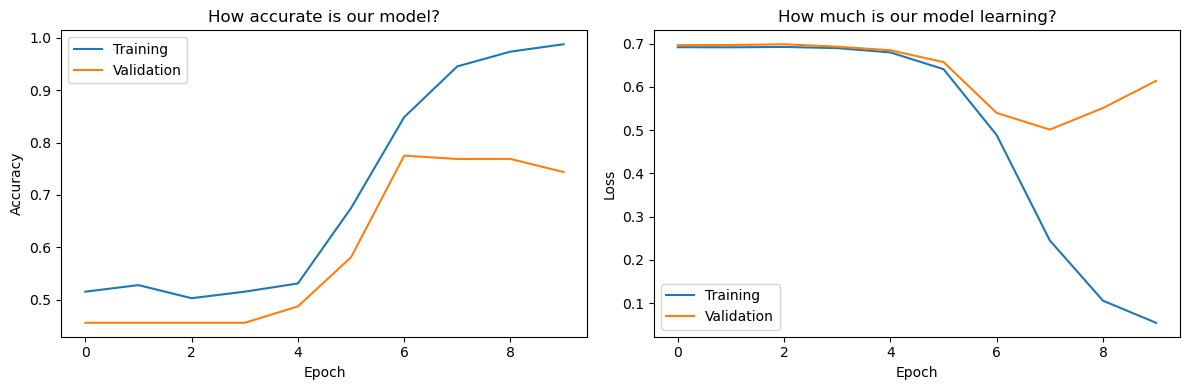


Testing our model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Accuracy: 74.00%

Detailed Results:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        96
           1       0.74      0.77      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



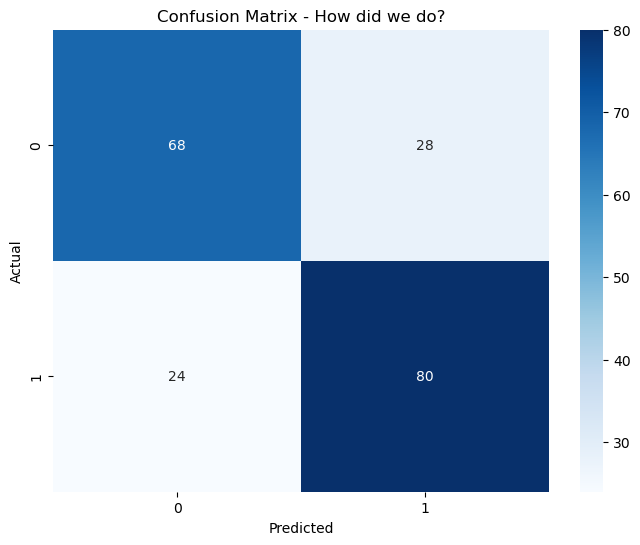

In [5]:
# Show confusion matrix
def plot_confusion_mat(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - How did we do?')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Main part of our program
if __name__ == "__main__":
    # Set up our parameters
    VOCAB_SIZE = 5000  # How many unique words to keep
    MAX_LEN = 100     # Max length of each review
    EMB_DIM = 16      # Size of word embeddings
    BATCH_SIZE = 32   # How many reviews to process at once
    EPOCHS = 10       # How many times to go through the data
    
    print("Loading our restaurant reviews...")
    reviews_df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
    
    print("Cleaning up the text...")
    reviews_df['Clean_Review'] = reviews_df['Review'].apply(clean_text)
    
    print("Converting text to numbers...")
    # Create our tokenizer
    tokenizer = Tokenizer(num_words=VOCAB_SIZE)
    tokenizer.fit_on_texts(reviews_df['Clean_Review'])
    
    # Convert reviews to sequences
    sequences = tokenizer.texts_to_sequences(reviews_df['Clean_Review'])
    
    # Make all sequences the same length
    X = pad_sequences(sequences, maxlen=MAX_LEN)
    y = reviews_df['Liked'].values
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42)
    
    # Create our model
    print("Building the neural network...")
    model = build_model(VOCAB_SIZE, EMB_DIM, MAX_LEN)
    
    # Set up early stopping to prevent overtraining
    early_stop = EarlyStopping(monitor='val_loss', 
                              patience=3,
                              restore_best_weights=True)
    
    # Train the model
    print("Training the model...")
    history = model.fit(X_train, y_train,
                       epochs=EPOCHS,
                       batch_size=BATCH_SIZE,
                       validation_split=0.2,
                       callbacks=[early_stop])
    
    # Show how training went
    plot_progress(history)
    
    # Test the model
    print("\nTesting our model...")
    predictions = model.predict(X_test)
    predictions = (predictions > 0.5).astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"\nAccuracy: {accuracy:.2%}")
    
    # Show detailed results
    print("\nDetailed Results:")
    print(classification_report(y_test, predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_mat(cm)
    
    # Function to test new reviews
    def check_sentiment(review_text):
        # Clean the review
        clean_review = clean_text(review_text)
        # Convert to sequence
        sequence = tokenizer.texts_to_sequences([clean_review])
        # Pad sequence
        padded = pad_sequences(sequence, maxlen=MAX_LEN)
        # Get prediction
        score = model.predict(padded)[0][0]
        
        # Return result
        if score > 0.5:
            return f"Positive ({score:.2%} confident)"
        else:
            return f"Negative ({(1-score):.2%} confident)"
    
    

In [ ]:
test_reviews =input("Please enter your review here: ")
    
result = check_sentiment(test_reviews)
print(f"\nReview: {test_reviews}")
print(f"Sentiment: {result}")